In [1]:
import os, sys
sys.path.append('../')

import pandas as pd
import requests
import matplotlib.pyplot as plt

# Operations 
from datetime import datetime
from modules.crud_operations import fill_operations_from_user

In [2]:
host = "localhost"

# MyInvestments

## Estado Atual da carteira

### Investimentos em renda variável

In [3]:
path = "dummy_report"
url = f"http://{host}:5000/{path}"

response = requests.get(url)
data = response.json()
pd.DataFrame(data['variable_rents'])

,acquisition,current_value,current_value_by_unit,id,profit,purchase_price,purchase_price_by_unit,sector,title,type,units
0,01/10/2021,300,100.89,1,0.3,240.8,80.9,mining,VALE3,stock,3


### Investimento em renda fixa

In [4]:
pd.DataFrame(data['fixed_rents'])

,acquisition,base_rent,current_tax,current_value,due_date,extra_rent,id,liquidity,purchase_price,title
0,01/05/2020,selic,0.25,101.5,01/05/2025,0,1,d_plus_1,100.5,selic 2025


### Resumo

In [5]:
pd.Series(data['summary'])

applied_value     504.50
gross_profit       10.50
liquidy_profit     10.25
taxes               0.25
dtype: float64

### Histórico

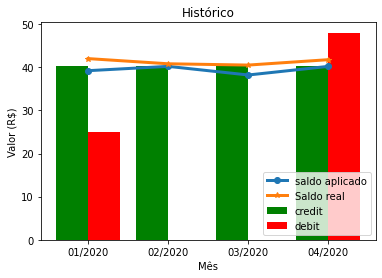

In [6]:
# plt.figure(figsize=(15,5))

history = pd.DataFrame(data['history'])
plt.plot(history.balance, label="saldo aplicado", linewidth=3, marker="o")
# plt.plot(history.target)
plt.plot(history.balance_with_profit, label="Saldo real", linewidth=3, marker="*")
plt.bar(history.index-0.2, history.credit, width=0.4, color='green', label="credit")
plt.bar(history.index+0.2, history.debit, width=0.4, color='red', label="debit")
plt.xticks(history.index, history.date)
plt.title("Histórico")
plt.xlabel("Mês")
plt.ylabel("Valor (R$)")
plt.legend();

In [7]:
history = pd.DataFrame(data['history'])
# history.set_index("date")

### Distribuição por setor

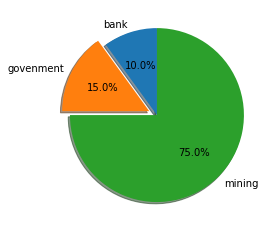

In [8]:
labels = data['distribution_by_sector'].keys()
sizes = data['distribution_by_sector'].values()
explode = (0, 0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

# pd.Series(data['distribution_by_sector'])

### Distribuição por título

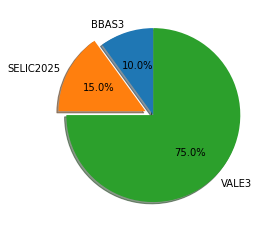

In [9]:
# pd.Series(data['distribution_by_title'])

key = "distribution_by_title"
labels = data[key].keys()
sizes = data[key].values()
explode = (0, 0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

# pd.Series(data['distribution_by_sector'])

### Distribuição por natureza

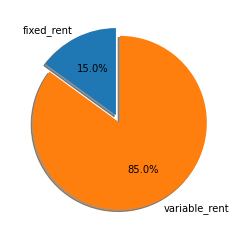

In [10]:
# pd.Series(data['distribution_by_nature'])

key = "distribution_by_nature"
labels = data[key].keys()
sizes = data[key].values()
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

### Evolução por setor

In [11]:
print(data['evolution_by_sector'][0]['title'])
pd.DataFrame(data['evolution_by_sector'][0]['data'])

BBAS3


,date,value
0,05/2021,100.5
1,06/2021,100.5
2,06/2021,100.5


## Operações sobre a carteira

In [13]:
operacoes = fill_operations_from_user()

Cadastro de operações!



	 Valor: R$ 50
	 Tipo da operação dict_keys(['c', 'v', 't']):  c
	 Título do investimento:  bbas3
	 Natureza do investimento dict_keys(['f', 'v']):  v
	 Descrição (Opcional):  
		 Deseja adicionar uma nova operação? [S/N]:  n


In [14]:
operacoes

[InvestmentOperation(id=None, date=datetime.datetime(2021, 10, 4, 19, 46, 30, 396446), type=<ExchangeOperation.BUY: 'buy'>, value=50.0, coin=<Coin.BRL: 'brl'>, title='bbas3', investment_nature=<InvestmentNature.VARIABLE: 'variable'>, description='')]